ARIMA MODEL NO DECOMP OR DIFFERNCING PRIOR TO RUNNING

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
#filepath
NYT_file="Potential Data Sources/NYT- Cty Cases Deaths Thru Oct2/us-counties.csv"

#read dataset
NYT=pd.read_csv(NYT_file, parse_dates=['date'])

# limit dataset to texas
Texas=NYT.loc[NYT['state']=='Texas'].dropna(how='any', axis=0)
Texas['county']=Texas['county'].map(str)+' County'
Texas2=Texas.drop(['fips', 'state'], axis=1)

### pick a county
CtyName='Bexar County'
CountyChoice=Texas2.loc[Texas2['county']==CtyName].set_index('date')
CountyChoice2=CountyChoice.drop('county', axis=1)

# CountyChoice2=Texas2
CountyChoice2

,cases,deaths
date,,
2020-02-12,1,0
2020-02-13,2,0
2020-02-14,2,0
2020-02-15,2,0
2020-02-16,2,0
...,...,...
2020-09-29,57689,1303
2020-09-30,57844,1313
2020-10-01,57948,1318


In [3]:
#param analysis for ARIMA model:
data=CountyChoice2['cases']

# Import the library 
from pmdarima import auto_arima 
  
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(data, start_p = 1, start_q = 1, 
                          max_p = 10, max_q = 10, m = 12, #monthly
                          start_P = 0, seasonal = True, 
                          stationary=True,
                          trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=3641.428, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=5341.127, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=5466.899, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=3658.993, Time=0.20 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=3638.265, Time=0.65 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=3636.865, Time=0.78 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=3636.724, Time=1.29 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=1.71 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=inf, Time=1.42 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=2.27 sec
 ARIMA(2,0,1)(2,0,0)[12] intercept   : AIC=inf, Time=1.47 sec
 ARIMA(1,0,2)(2,0,0)[12] intercept   : AIC=3629.956, Time=1.59 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=3630.1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  235
Model:             SARIMAX(1, 0, 3)x(1, 0, [], 12)   Log Likelihood               -1786.155
Date:                             Fri, 16 Oct 2020   AIC                           3584.309
Time:                                     14:02:34   BIC                           3605.067
Sample:                                          0   HQIC                          3592.678
                                             - 235                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998      0.000   2740.428      0.000       0.999       1.001
ma.L1          0.1422      0.047      3.027      0.002       0.050       0.234
ma.L2          0.4339      0.039     11.257      0.000       0.358       0.509
ma.L3          0.5101      0.049     10.347      0.000       0.413       0.607
ar.S.L12       0.2145      0.097      2.206      0.027       0.024       0.405
sigma2      2.253e+05   8726.960     25.814      0.000    2.08e+05    2.42e+05
===================================================================================
Ljung-Box (Q):                       56.68   Jarque-Bera (JB):             24284.41
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):             557.58   Skew:                             5.52
Prob(H) (two-sided):                  0.00   Kurtosis:                        51.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [4]:
# Split data into train / test sets 
# Isolate only the transformed data into a dataframe for the model

# split test train 
end_train=pd.to_datetime('2020-07-31')
start_test=pd.to_datetime('2020-08-01')
train=data[:end_train]
test=data[start_test:]
print(train.shape, test.shape)

(171,) (64,)


In [5]:
# Fit a SARIMAX(1,0,1)(2,0,0,12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train,  
                order = (1, 0, 1),  
                seasonal_order =(2, 0, 0, 12)) 
  
result = model.fit() 
result.summary() 

C:\Users\track\anaconda3\envs\MachineLearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\track\anaconda3\envs\MachineLearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\track\anaconda3\envs\MachineLearning\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               cases   No. Observations:                  171
Model:             SARIMAX(1, 0, 1)x(2, 0, [], 12)   Log Likelihood               -1311.793
Date:                             Fri, 16 Oct 2020   AIC                           2633.585
Time:                                     14:02:34   BIC                           2649.294
Sample:                                 02-12-2020   HQIC                          2639.959
                                      - 07-31-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9995      0.001    779.553      0.000       0.997       1.002
ma.L1          0.1425      0.080      1.779      0.075      -0.014       0.299
ar.S.L12       0.3560      0.089      4.006      0.000       0.182       0.530
ar.S.L24       0.2784      0.244      1.139      0.255      -0.201       0.757
sigma2      2.478e+05   6752.239     36.702      0.000    2.35e+05    2.61e+05
===================================================================================
Ljung-Box (Q):                       96.02   Jarque-Bera (JB):             46411.97
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):            2409.80   Skew:                             7.85
Prob(H) (two-sided):                  0.00   Kurtosis:                        82.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

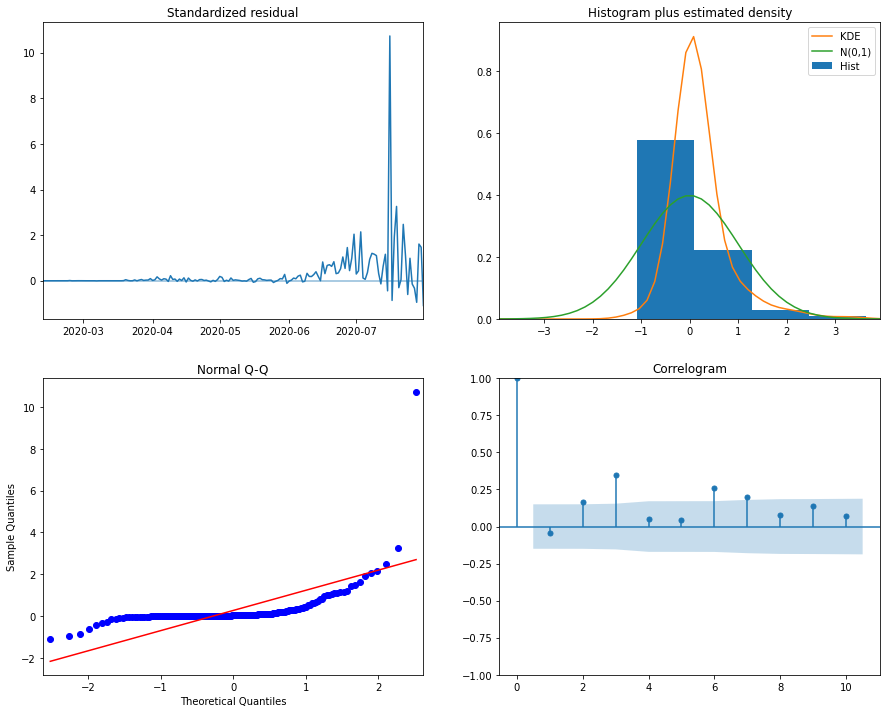

In [6]:
result.plot_diagnostics(figsize=(15,12));

<AxesSubplot:xlabel='date'>

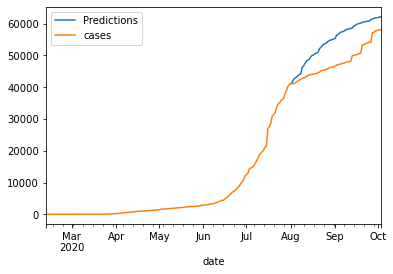

In [7]:
# compare test train
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end).rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
data.plot(legend = True) 

In [8]:
#  get results for full dataset:
end=pd.to_datetime('2020-10-03')
start=pd.to_datetime('2020-04-01')
formodel=data[start:end]

model = SARIMAX(formodel,  
                order = (1, 0, 1),  
                seasonal_order =(2, 0, 0, 12)) 
  
result = model.fit() 
result.summary()

C:\Users\track\anaconda3\envs\MachineLearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\track\anaconda3\envs\MachineLearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


LinAlgError: Array must not contain infs or NaNs

In [9]:
# Getting 120 days (a little more than 6 months in business days) for forecasts
SARIMAX_forecast = round(result.forecast(steps = 90))

idx = pd.date_range('2020-10-04', '2021-01-01', freq='d')
 
SARIMAX_forecast = pd.DataFrame(list(zip(list(idx),list(SARIMAX_forecast))),
columns=['Date','Forcast Cases']).set_index('Date')


print(SARIMAX_forecast)



            Forcast Cases
Date                     
2020-10-04        41130.0
2020-10-05        41578.0
2020-10-06        42422.0
2020-10-07        42941.0
2020-10-08        43176.0
...                   ...
2020-12-28        63876.0
2020-12-29        63957.0
2020-12-30        63995.0
2020-12-31        63988.0
2021-01-01        64009.0

[90 rows x 1 columns]


(18353.0, 18627.0)

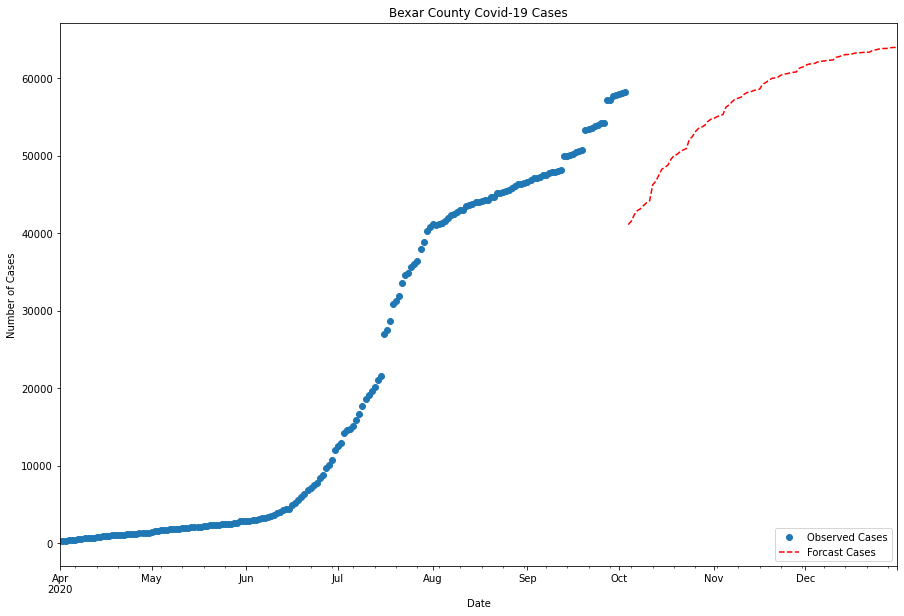

In [10]:
# Graph
fig, ax = plt.subplots(figsize=(15,10))
npre = 4
ax.set(title= f'{CtyName} Covid-19 Cases', xlabel='Date', ylabel='Number of Cases')


# Plot data points
data.loc['2020-04-01':].plot(ax=ax, style='o', label='Observed Cases')

# Plot predictions
SARIMAX_forecast.loc['2020-10-03':].plot(ax=ax, style='r--', label='Sarimax forecast')

# predict.predicted_mean.loc['2020-04-01':].plot(ax=ax, style='r--', label='One-step-ahead forecast')
# ci = predict_ci.loc['2020-04-01':]
# ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)
# predict_dy.predicted_mean.loc['2020-04-01':].plot(ax=ax, style='g', label='Dynamic forecast')
# ci = predict_dy_ci.loc['2020-04-01':]
# ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='g', alpha=0.1)


legend = ax.legend(loc='lower right')
ax.set_xlim(np.datetime64('2020-04-01'), np.datetime64('2020-12-31'))